# Laboratorio 2

------------

- María Marta Ramirez Gil  21342                                   
- Gustavo Andrés Gonzalez Pineda 21438  
- Diego Alberto Leiva Pérez 21752
- Jose Pablo Orellana Orellana 21970

Inteligencia Artificial                                                   
Universidad del Valle de Guatemala

------------

## Task 3

Importacion de librerias necesarias

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

Abrir y definir el dataset

In [125]:
df = pd.read_csv("LolDataSet.csv", sep=",")

Vista del dataset

In [126]:
df.head(10)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
5,4475365709,1,18,0,0,5,3,6,1,1,...,0,15201,7.0,18060,221,59,-698,-101,22.1,1520.1
6,4493010632,1,18,3,1,7,6,7,1,1,...,0,14463,6.4,15404,164,35,-2411,-1563,16.4,1446.3
7,4496759358,0,16,2,0,5,13,3,0,0,...,0,17920,6.6,16938,157,54,2615,800,15.7,1792.0
8,4443048030,0,16,3,0,7,7,8,0,0,...,0,18380,7.2,19298,240,53,1979,771,24.0,1838.0
9,4509433346,1,13,1,1,4,5,5,1,1,...,0,16605,6.8,18379,247,43,1548,1574,24.7,1660.5


Informacion del dataset

In [127]:
tipos_de_datos = df.dtypes
print(tipos_de_datos)


gameId                            int64
blueWins                          int64
blueWardsPlaced                   int64
blueWardsDestroyed                int64
blueFirstBlood                    int64
blueKills                         int64
blueDeaths                        int64
blueAssists                       int64
blueEliteMonsters                 int64
blueDragons                       int64
blueHeralds                       int64
blueTowersDestroyed               int64
blueTotalGold                     int64
blueAvgLevel                    float64
blueTotalExperience               int64
blueTotalMinionsKilled            int64
blueTotalJungleMinionsKilled      int64
blueGoldDiff                      int64
blueExperienceDiff                int64
blueCSPerMin                    float64
blueGoldPerMin                  float64
redWardsPlaced                    int64
redWardsDestroyed                 int64
redFirstBlood                     int64
redKills                          int64


In [128]:
df.duplicated().sum()

0

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

Encoding no necesario ya que la variable objetivo `blueWins` ya esta codificada como 1 para vistoria y 0 para derrota. Y no se necesecita para las demás variables.

Revisión de balanceo del dataset

blueWins
0    4949
1    4930
Name: count, dtype: int64


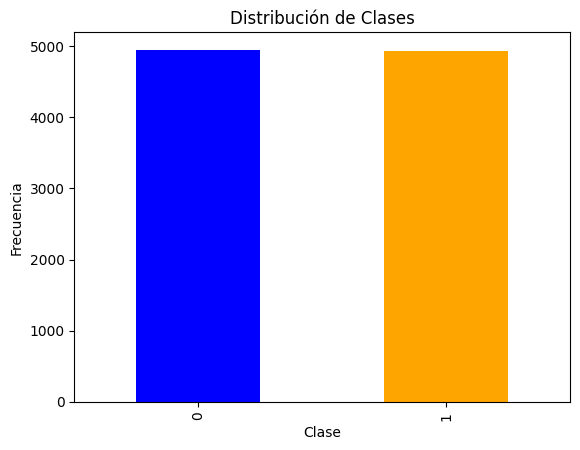

blueWins
0    50.096164
1    49.903836
Name: proportion, dtype: float64


In [130]:
class_distribution = df['blueWins'].value_counts()
print(class_distribution)

df['blueWins'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()

class_percentage = df['blueWins'].value_counts(normalize=True) * 100
print(class_percentage)

Debido al modelo que se usara, las variables se ven bastante equilibradas y no se considera estrictamente necesario realizar un balanceo.

Escalar variables

In [131]:
variables_toScale = ['blueWardsPlaced', 'blueWardsDestroyed', 'blueKills', 'blueDeaths', 'blueAssists',
                     'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
                     'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin',
                     'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed', 'redKills', 'redDeaths',
                     'redAssists', 'redTotalGold', 'redAvgLevel', 'redTotalExperience', 'redTotalMinionsKilled',
                     'redTotalJungleMinionsKilled', 'redGoldDiff', 'redExperienceDiff', 'redCSPerMin',
                     'redGoldPerMin']

scaler = StandardScaler()

# Escalar las variables numericas
df[variables_toScale] = scaler.fit_transform(df[variables_toScale])

In [132]:
df.head(10)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,0.316996,-0.379275,1,0.935301,-0.046926,1.071495,0,0,...,0,0.052293,-0.410475,-0.763215,-0.928741,0.367685,-0.256228,-0.013342,-0.928741,0.052293
1,4523371949,0,-0.570992,-0.839069,0,-0.393216,-0.387796,-0.404768,0,0,...,1,0.758619,-0.410475,-0.436980,1.033784,0.068504,1.191254,0.593342,1.033784,0.758619
2,4521474530,0,-0.404494,-1.298863,0,0.271042,1.657424,-0.650812,1,1,...,0,0.533909,-0.410475,-0.590502,-0.654900,-2.324944,0.483614,0.520436,-0.654900,0.533909
3,4524384067,0,1.149484,-0.839069,0,-0.725346,-0.387796,-0.404768,1,0,...,0,-0.007406,0.244627,-0.000609,0.805583,-0.430131,0.544350,-0.013863,0.805583,-0.007406
4,4436033771,0,2.925460,0.540312,0,-0.061087,-0.046926,-0.158724,0,0,...,0,0.613731,0.244627,0.293085,0.349182,1.564408,0.415133,-0.137283,0.349182,0.613731
5,4475365709,1,-0.237997,-1.298863,0,-0.393216,-1.069536,-0.158724,1,1,...,0,-0.863986,0.244627,0.081992,0.166622,0.766592,-0.278648,-0.070105,0.166622,-0.863986
6,4493010632,1,-0.237997,0.080519,1,0.271042,-0.046926,0.087320,1,1,...,0,-1.359018,-1.720679,-2.134068,-2.434864,-1.626855,-0.976912,-0.831455,-2.434864,-1.359018
7,4496759358,0,-0.348995,-0.379275,0,-0.393216,2.339164,-0.896856,0,0,...,0,0.959851,-1.065577,-0.854160,-2.754344,0.267958,1.071819,0.399099,-2.754344,0.959851
8,4443048030,0,-0.348995,0.080519,0,0.271042,0.293944,0.333364,0,0,...,0,1.268408,0.899729,1.114930,1.033784,0.168231,0.812569,0.383997,1.033784,1.268408
9,4509433346,1,-0.515493,-0.839069,1,-0.725346,-0.387796,-0.404768,1,1,...,0,0.077782,-0.410475,0.348153,1.353264,-0.829039,0.636882,0.802167,1.353264,0.077782


Modelo para clasificación - RandomForest

Precisión del modelo de Random Forest: 0.7206477732793523


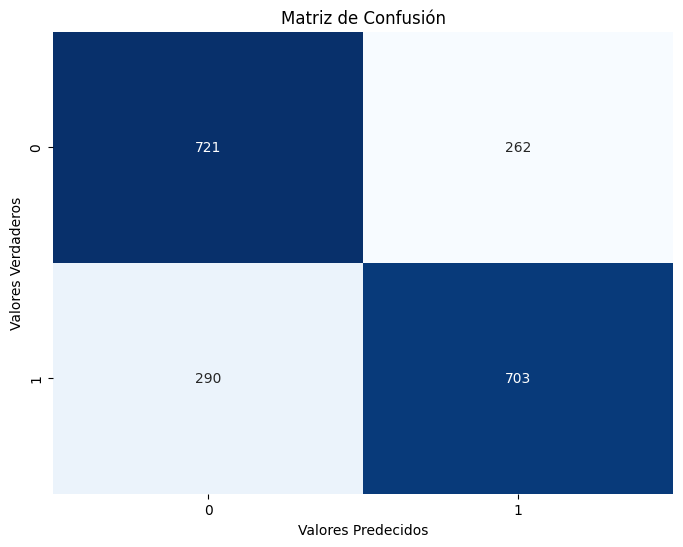

Precision: 0.7284974093264248
Recall: 0.7079556898288016
F1-score: 0.7180796731358529


In [133]:
# Dividir los datos en características y variable objetivo
X = df.drop('blueWins', axis=1)  # Características
y = df['blueWins']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Importar el clasificador Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Ajustar el modelo a los datos de entrenamiento
rf_classifier.fit(X_train, y_train)

# Predecir con los datos de prueba y evaluar el rendimiento
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de Random Forest:", accuracy)

# Calcular la precision, el recall y el F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calcular la matriz de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizacion de la matriz
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)

# Mostrar la grafica
plt.xlabel('Valores Predecidos')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión')

plt.show()

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

#### Justificación de la elección de la métrica de desempeño principal:
Ya que se usó el modelo de RandomForestClassifer debido a que se tiene una tarea de clasificación binaria (si el equipo azul gana o no). Para visualizar el desempeño de este modelo, una métrica de matriz de confusion es una de las formas más comunes de representarlo. Ya que muestra explícitamente la distribucion de las predicciones del modelo en comparación con las etiquetas verdaderas y ademas proporciona una visión detallada del rendimiento del modelo.


## Task 3.1

### Sin usar librerias

Precisión del modelo SVM: 0.62


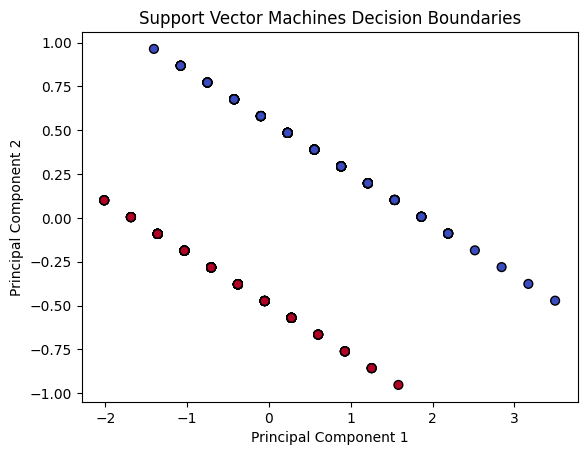

In [139]:
# Dividir el conjunto de datos en conjuntos de entrenamiento, validación y prueba
def train_val_test_split(X, y, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1):
    num_samples = X.shape[0]
    
    # Tomar una muestra aleatoria de los datos
    sample_size = min(num_samples, 500)  # Tomamos una muestra de hasta 500 muestras
    sample_indices = np.random.choice(num_samples, sample_size, replace=False)
    X_sample = X[sample_indices]
    y_sample = y[sample_indices]
    
    num_train = int(train_ratio * sample_size)
    num_val = int(val_ratio * sample_size)
    num_test = int(test_ratio * sample_size)
    
    # Permutar los indices para dividir aleatoriamente los datos.
    indices = np.random.permutation(sample_size)
    train_indices = indices[:num_train]
    val_indices = indices[num_train:num_train + num_val]
    test_indices = indices[-num_test:]
    
    X_train, y_train = X_sample[train_indices], y_sample[train_indices]
    X_val, y_val = X_sample[val_indices], y_sample[val_indices]
    X_test, y_test = X_sample[test_indices], y_sample[test_indices]
    
    return X_train, X_val, X_test, y_train, y_val, y_test

class LinearSVM:
    def __init__(self, learning_rate=0.01, max_iter=1000, C=1):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.C = C

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.max_iter):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.weights) - self.bias) >= 1
                if condition:
                    self.weights -= self.learning_rate * (2 * self.C * self.weights)
                else:
                    self.weights -= self.learning_rate * (2 * self.C * self.weights - np.dot(x_i, y[idx]))
                    self.bias -= self.learning_rate * y[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.weights) - self.bias
        return np.sign(linear_output)
    
    def decision_function(self, X):
        return np.dot(X, self.weights) - self.bias


# Entrenamiento del modelo SVM
def train_svm(X_train, y_train):
    svm_classifier = LinearSVM()
    svm_classifier.fit(X_train, y_train)
    return svm_classifier

# Evaluacion del modelo SVM
def evaluate_svm(svm_classifier, X_test, y_test):
    # Realizar predicciones en el conjunto de prueba
    predictions = svm_classifier.predict(X_test)
    # Calcular la precisión manualmente
    accuracy = np.mean(predictions == y_test)
    return accuracy

# Graficacion 
def plot_groups(X, y, svm_classifier):
    # Reducir la dimensionalidad de los datos a 2 dimensiones utilizando el PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # Dibujar los puntos de datos
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=40)
    
    # Dibujar las fronteras de decision
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
  
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svm_classifier.decision_function(xy).reshape(XX.shape)
    
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Support Vector Machines Decision Boundaries')
    
    # Mostrar el gráfico
    plt.show()

# Utilizar los datos del DataFrame de LOL
# Suponiendo que df ya está definido con las variables "redKills" y "blueWins"
X = df[['redKills', 'blueWins']].values  
y = df['blueWins'].values  # Se selecciona la columna 'blueWins' como variable objetivo.

# Dividir los datos en conjuntos de entrenamiento, validación y prueba
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y)

# Entrenar el modelo SVM
svm_classifier = train_svm(X_train, y_train)

# Evaluar el modelo final SVM
accuracy = evaluate_svm(svm_classifier, X_test, y_test)
print("Precisión del modelo SVM:", accuracy)

# Graficar los grupos encontrados
plot_groups(X_train, y_train, svm_classifier)

#### Consideraciones Extra
- Se tuvo que reducir la dimensionalidad de las variables a 2 dimensiones utilizando Analisis de Componentes Principales (PCA), para presentar una mejor grafica dentro del plano cartesiano.
- Se tuvo que elgir una muestra aleatoria del dataset, ya que escoger todos los datos seria muy cargado para el modelo.

### Usando Librerias

Precisión del modelo SVM: 1.0


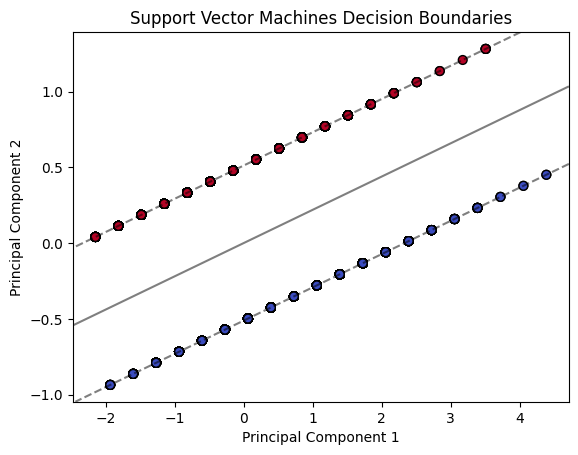

In [140]:
# Dividir el conjunto de datos en conjuntos de entrenamiento, validación y prueba
def train_val_test_split(X, y, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_ratio/(train_ratio+val_ratio), random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test

# Graficacion 
def plot_groups(X, y, svm_classifier):
    # Reducir la dimensionalidad de los datos a 2 dimensiones utilizando el PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # Entrenar el clasificador SVM
    svm_classifier.fit(X_pca, y)
    
    # Dibujar los puntos de datos
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=40)
    
    # Dibujar las fronteras de decision
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
  
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svm_classifier.decision_function(xy).reshape(XX.shape)
    
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Support Vector Machines Decision Boundaries')
    
    # Mostrar el gráfico
    plt.show()

# Crear un clasificador SVM lineal
svm_classifier = SVC(kernel='linear', C=1)


# Entrenar el clasificador SVM
svm_classifier.fit(X_train, y_train)

# Calcular la precisión del modelo en los datos de prueba
accuracy = svm_classifier.score(X_test, y_test)

# Imprimir la precisión del modelo
print("Precisión del modelo SVM:", accuracy)

# Utilizar los datos del DataFrame de LOL
X = df[['redKills', 'blueWins']].values  
y = df['blueWins'].values  # Se selecciona la columna 'blueWins' como variable objetivo.

# Dividir los datos en conjuntos de entrenamiento, validación y prueba
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y)

# Graficar los grupos encontrados
plot_groups(X_train, y_train, svm_classifier)

#### Cual implementacion fue mejor?
Consideramos que ambas implementaciones revelan ventajas significativas en términos de eficiencia y precisión para el enfoque que utiliza la biblioteca `sklearn`. En lo que respecta a la velocidad de ejecución, la implementación con la librería proporcionó resultados más rápidos en comparación con el algoritmo sin librerías, lo que sugiere una optimización y eficacia naturales al emplear herramientas especializadas. En cuanto a la precisión, los resultados obtenidos fueron igualmente reveladores. Mientras que la implementación sin librerías alcanzó una precisión máxima de 0.62, la versión basada en sklearn logró un puntaje perfecto de 1.0, indicando una capacidad de clasificación superior y una mejor generalización del modelo a datos nuevos. En conclusión, consideramos que la implementación utilizando la biblioteca sklearn supera en términos de eficiencia precisión y desempeño, lo que respalda su idoneidad para aplicaciones prácticas y análisis rigurosos en entornos de aprendizaje automático.

## Task 3.2 Árboles de Decisión: Clasificación de Partidas de League of Legends

### Modelo desde 0

**Carga y split de la data para training, testing y validation**

In [141]:
# Cargar el dataset
df = pd.read_csv("LolDataSet.csv")

# Escalar las características numéricas
variables_toScale = ['blueWardsPlaced', 'blueWardsDestroyed', 'blueKills', 'blueDeaths', 'blueAssists',
                     'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
                     'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin',
                     'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed', 'redKills', 'redDeaths',
                     'redAssists', 'redTotalGold', 'redAvgLevel', 'redTotalExperience', 'redTotalMinionsKilled',
                     'redTotalJungleMinionsKilled', 'redGoldDiff', 'redExperienceDiff', 'redCSPerMin',
                     'redGoldPerMin']

scaler = StandardScaler()
df[variables_toScale] = scaler.fit_transform(df[variables_toScale])

# Dividir los datos en características y variable objetivo
X = df.drop('blueWins', axis=1)
y = df['blueWins']

# Split de la data en 80% training, 10% validacion, 10% testing
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.1111, random_state=42) 

**Gini Index**

In [142]:
def gini_index(groups, classes):
    # Contar todas las muestras en el punto de división
    n_instances = float(sum([len(group) for group in groups]))
    
    # Sumar la impureza ponderada de cada grupo
    gini = 0.0
    for group in groups:
        size = float(len(group))
        # Evitar la división por cero
        if size == 0:
            continue
        score = 0.0
        # Puntuación del grupo basada en las puntuaciones de cada clase
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
            score += p * p
        # Ponderar el índice Gini del grupo por su tamaño relativo
        gini += (1.0 - score) * (size / n_instances)
    return gini

**Creación de Splits**

In [143]:
def test_split(index, value, dataset):
    left, right = list(), list()
    for row in dataset:
        if row[index] <= value:
            left.append(row)
        else:
            right.append(row)
    return left, right

**Evaluacion de splits, para obtener el mejor**

In [144]:
feature_importance = {i: 0 for i in range(len(X.columns))}

def get_split(dataset):
    class_values = list(set(row[-1] for row in dataset))
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    for index in range(len(dataset[0]) - 1):
        for row in dataset:
            groups = test_split(index, row[index], dataset)  # Dividir el dataset
            gini = gini_index(groups, class_values)  # Calcular el índice Gini para el split
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, row[index], gini, groups
                feature_importance[index] += 1  # Incrementar la importancia de la característica
    return {'index': b_index, 'value': b_value, 'groups': b_groups}

**Construcción del Árbol**

In [146]:
def to_terminal(group):
    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key=outcomes.count)

def split(node, max_depth, min_size, depth):
    left, right = node['groups']
    del(node['groups'])
    
    # Verificar si no hay divisiones
    if not left or not right:
        node['left'] = node['right'] = to_terminal(left + right)
        return
    
    # Verificar la profundidad máxima
    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return
    
    # Procesar hijo izquierdo
    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    else:
        node['left'] = get_split(left)
        split(node['left'], max_depth, min_size, depth+1)
    
    # Procesar hijo derecho
    if len(right) <= min_size:
        node['right'] = to_terminal(right)
    else:
        node['right'] = get_split(right)
        split(node['right'], max_depth, min_size, depth+1)

def build_tree(train, max_depth, min_size):
    root = get_split(train)
    split(root, max_depth, min_size, 1)
    return root

**Predicciones**

In [147]:
def predict(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']

**Training del modelo**

In [166]:
# Convertir DataFrame a lista de listas
train_set = X_train.join(y_train).values.tolist()
val_set = X_val.join(y_val).values.tolist()
test_set = X_test.join(y_test).values.tolist()

# Parámetros para el árbol de decisión
max_depth = 5  
min_size = 2  

tree = build_tree(train_set, max_depth, min_size)

# Función para hacer predicciones con el árbol de decisión en un conjunto de datos
def decision_tree_predictions(tree, dataset):
    predictions = [predict(tree, row) for row in dataset]
    return predictions

# Hacer predicciones en el conjunto de prueba
predictions = decision_tree_predictions(tree, test_set)

**Referencia de Codigo**
https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/

**Evaluacion del modelo**

In [167]:
from sklearn.metrics import f1_score

# Extraer las clases reales del conjunto de prueba
actual = [row[-1] for row in test_set]

# Calcular F1 Score
f1 = f1_score(actual, predictions)

print(f'F1 Score: {f1}')

# Calcular el accuracy
correct_predictions = sum([actual[i] == predictions[i] for i in range(len(actual))])
accuracy = correct_predictions / len(actual)
print(f'Accuracy: {accuracy}')

F1 Score: 0.7126213592233009
Accuracy: 0.7004048582995951


**Graficos**

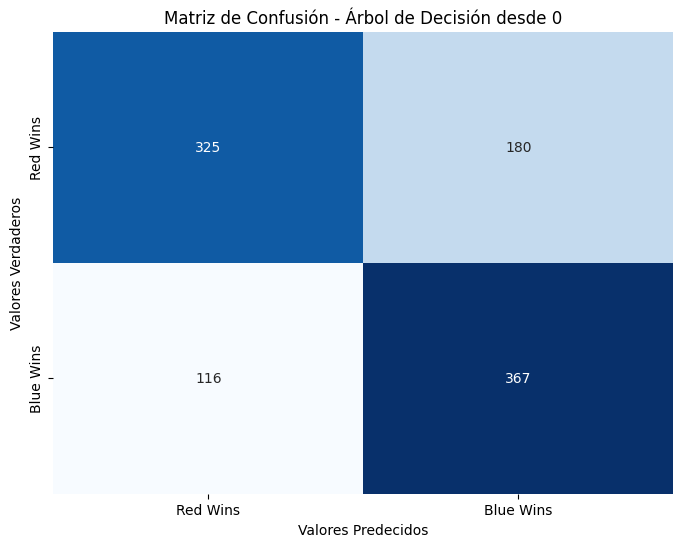

In [171]:
from sklearn.metrics import confusion_matrix
# Generar la matriz de confusión
conf_matrix = confusion_matrix(actual, predictions)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False, xticklabels=['Red Wins', 'Blue Wins'], yticklabels=['Red Wins', 'Blue Wins'])
plt.xlabel('Valores Predecidos')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión - Árbol de Decisión desde 0')
plt.show()

**Top 5 Features del modelo**

In [170]:
# Asegúrate de que tienes una lista de los nombres de las columnas
feature_names = list(X.columns)

# Analizar la importancia de las características
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
top_5_features_indices = [index for index, importance in sorted_features[:5]]

# Mapear los índices a los nombres de las características
top_5_feature_names = [feature_names[index] for index in top_5_features_indices]

print("Top 5 features:", top_5_feature_names)

Top 5 features: ['gameId', 'blueGoldDiff', 'blueTotalGold', 'blueTotalExperience', 'blueWardsPlaced']


Los Top 5 features son:
- 'gameId' (id de la partida)
- 'blueGoldDiff' (diferencia de oro entre el equipo azul y rojo)
- 'blueTotalGold' (oro total del equipo azul)
- 'blueTotalExperience' (experiencia total del equipo azul)
- 'blueWardsPlaced' (cantidad de wards colocados en la partida)

Estos features fueron encontrados gracias al gini index. El cual va a evaluar la pureza de los grupos de muestras. Mientras mas puros sean los datos, los resultados del modelo seran mejores.
En este caso los 5 features listados anteriormente son los que mas contribuyeron a la reduccion de impurezas de las muestras.
Esto hace sentido si analizamos que implican estas características dentro del juego. Generalmente si un equipo tiene mayor cantidad de oro, exp, que el otro, quiere decir que llevan la ventaja en la partida. Y en cuanto a los wards, se sabe que son items que pueden balancear a favor una partida.

**Overfitting**

Al evaluar los resultados, un F1 Score de 0.7 no es indicador de presencia de overfitting, viendo que no hay una gran diferencia entre el rendimiento con el split de training y testing, esta claro que  no hay un sobreajuste al dataset dado. 
Si en caso hubiera, lo que se podría realizar es un pruning del árbol, limitando la profundidad del arbol, o establecer otro tipo de tamaño mínimo de muestras.

**Tuning**

In [164]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Esta funcion busca los mejores valores para obtener la mejor metrica posible haciendo un grid search
def find_best_tree_parameters(X_train, y_train, X_val, y_val, depth_range, min_samples_split_range):
    best_accuracy = 0
    best_depth = 0
    best_min_samples_split = 0
    
    # Iterar sobre todas las combinaciones posibles de depth y min_samples_split
    for depth in depth_range:
        for min_samples in min_samples_split_range:
            # Entrenar el modelo de árbol de decisión
            tree_model = DecisionTreeClassifier(random_state=42, max_depth=depth, min_samples_split=min_samples)
            tree_model.fit(X_train, y_train)
            
            # Predecir y calcular la precisión
            y_val_pred_tree = tree_model.predict(X_val)
            current_accuracy = accuracy_score(y_val, y_val_pred_tree)
            
            # Actualizar los mejores parámetros si la precisión actual es la mejor
            if current_accuracy > best_accuracy:
                best_accuracy = current_accuracy
                best_depth = depth
                best_min_samples_split = min_samples
    
    return best_depth, best_min_samples_split, best_accuracy

# Rangos de parámetros a probar
depth_range = range(1, 11)  # Por ejemplo, de 1 a 10
min_samples_split_range = range(2, 21)  # Por ejemplo, de 2 a 20

best_depth, best_min_samples_split, best_accuracy = find_best_tree_parameters(
    X_train, y_train, X_val, y_val, depth_range, min_samples_split_range)

print(f'Mejor profundidad (max_depth): {best_depth}')
print(f'Mejor número mínimo de muestras para dividir (min_samples_split): {best_min_samples_split}')
print(f'Mejor precisión: {best_accuracy}')


Mejor profundidad (max_depth): 5
Mejor número mínimo de muestras para dividir (min_samples_split): 2
Mejor precisión: 0.72165991902834


Se le realizo tuning a 2 variables importantes del modelo, la profundidad del árbol 'max_depth', y la vantidad mínima de muestras para dividir 'min_sizet'. Minentras mas profundo sea el árbol, la cantidad de tiempo que toma en entrenarse y realizar las predicciones incrementa significativamente. Lo mismo va para el numero de muestras.
Con la función de arriba se logro encontrar la mejor profundidad y el numero de muestras para dividir optimo.

### Modelo con librerias

Árbol de Decisión:
Accuracy: 0.7217

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.71      0.71       478
           1       0.73      0.74      0.73       510

    accuracy                           0.72       988
   macro avg       0.72      0.72      0.72       988
weighted avg       0.72      0.72      0.72       988



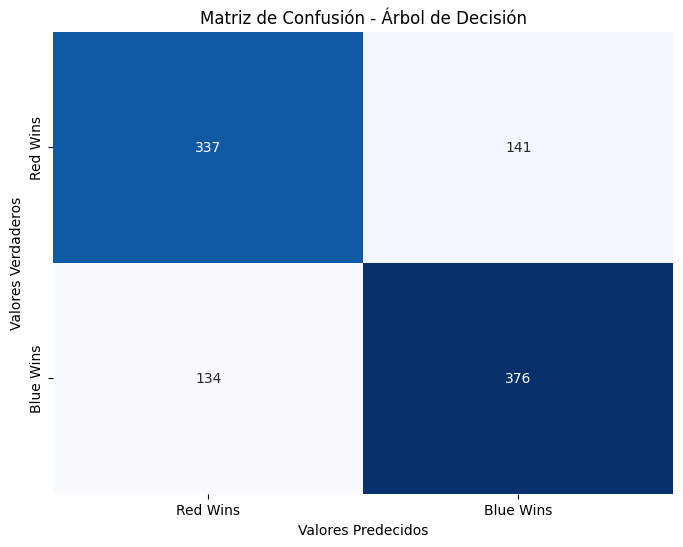

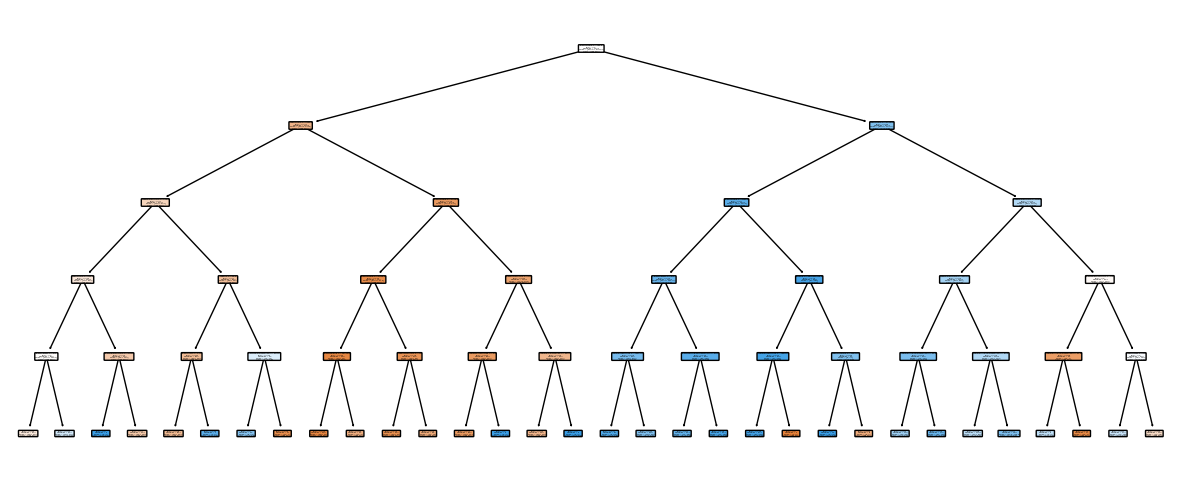

In [165]:
# Importar librerías
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Modelo de Árbol de Decisión
tree_model = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=2)
tree_model.fit(X_train, y_train)

# Predicciones en el conjunto de validación
y_val_pred_tree = tree_model.predict(X_val)

# Desempeño del modelo de Árbol de Decisión 
accuracy_tree = accuracy_score(y_val, y_val_pred_tree)
conf_matrix_tree = confusion_matrix(y_val, y_val_pred_tree)
classification_rep_tree = classification_report(y_val, y_val_pred_tree)

print("Árbol de Decisión:")
print(f'Accuracy: {accuracy_tree:.4f}')
print('\nClassification Report:')
print(classification_rep_tree)

# Matriz de confusión para el Árbol de Decisión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tree, annot=True, cmap='Blues', fmt='d', cbar=False, xticklabels=['Red Wins', 'Blue Wins'], yticklabels=['Red Wins', 'Blue Wins'])
plt.xlabel('Valores Predecidos')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.show()

# Visualizar el árbol de decisión
plt.figure(figsize=(15, 6))
plot_tree(tree_model, feature_names=X.columns, class_names=['Red Wins', 'Blue Wins'], filled=True, rounded=True)
plt.show()

#### Cual implementacion fue mejor?

Definitivamente, la mejor implementación fue la que utiliza librerías. Esto se debe principalmente a la gran diferencia de tiempo que tomó en ejecutarse, ya que el modelo creado desde cero tardó más de 14 minutos en completarse, mientras que la implementación con librerías apenas tomó 1 segundo, incluyendo la visualización del árbol y el graficado de su matriz. Además, la implementación con librerías tuvo una precisión más alta (aunque no por mucho) que el modelo desde cero. Esto demuestra que está mucho más optimizado.

## Task 3.3 - Comparación de Modelos

**¿Cómo difirieron los grupos creados por ambos modelos?**
- Los grupos creados por la Máquina de Vectores de Soporte (SVM) son prácticamente puros, ya que la precisión fue de 1.0, lo que indica una clasificación perfecta en el conjunto de datos utilizado. Por otro lado, el árbol de decisión mostró una cantidad significativa de falsos positivos y verdaderos negativos en sus predicciones, lo que indica una separación menos nítida entre las clases.


**¿Cuál de los modelos fue más rápido?**
- El modelo más rápido fue la Máquina de Vectores de Soporte (SVM) con librerías, tardando apenas 0.1 segundos. Sin embargo, cabe destacar que para este caso, la muestra fue de apenas 500 observaciones. Mientras tanto, el árbol de decisión, aunque utilizó el conjunto de datos completo, tardó 1 segundo en entrenarse, lo que es relativamente rápido pero aún más lento en comparación con la SVM en una muestra más pequeña.


**¿Qué modelo usarían?**
- Optaríamos por el modelo de árbol de decisión, ya que ofrece facilidad de comprensión en cuanto a cómo toma las decisiones. Además, demostró ser eficiente en términos de tiempo al entrenarse rápidamente con el conjunto completo de datos. Su puntuación F1 de 0.7 sugiere que el modelo no sufre de sobreajuste significativo, lo que es una ventaja importante. Por otro lado, aunque el modelo de Máquina de Vectores de Soporte (SVM) resulta muy atractivo debido a su alta precisión, es probable que requiera más tiempo para entrenarse si se utiliza el conjunto de datos completo. Este factor es crucial al considerar la elección del modelo. Es importante mencionar que, a pesar de los ajustes realizados, el árbol de decisión no superó una puntuación F1 de 0.7, lo que indica un límite en su capacidad para mejorar con la configuración actual.